#CAR PRICE PREDICTION WITH MACHINE LEARNING

In [21]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# 1. Loading the dataset
data = pd.read_csv('/content/car data.csv')

In [23]:
# Display the first few rows of the dataset
print("Initial dataset preview:")
print(data.head())

Initial dataset preview:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [24]:
# 2. Feature Engineering: Create 'Age' from 'Year'
# Since car prices depend on age, calculate age of the car
data['Age'] = 2024 - data['Year']

In [25]:
# Drop unnecessary columns ('Car_Name' and 'Year') as they are not needed for model training
data = data.drop(['Car_Name', 'Year'], axis=1)

In [26]:
# Display the modified dataset with the new 'Age' feature
print("\nDataset after feature engineering:")
print(data.head())


Dataset after feature engineering:
   Selling_Price  Present_Price  Driven_kms Fuel_Type Selling_type  \
0           3.35           5.59       27000    Petrol       Dealer   
1           4.75           9.54       43000    Diesel       Dealer   
2           7.25           9.85        6900    Petrol       Dealer   
3           2.85           4.15        5200    Petrol       Dealer   
4           4.60           6.87       42450    Diesel       Dealer   

  Transmission  Owner  Age  
0       Manual      0   10  
1       Manual      0   11  
2       Manual      0    7  
3       Manual      0   13  
4       Manual      0   10  


In [27]:
# 3. One-Hot Encoding: Converting categorical variables into numerical format
# This helps models interpret categorical data
data = pd.get_dummies(data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [28]:
# Display the dataset after one-hot encoding
print("\nDataset after one-hot encoding:")
print(data.head())


Dataset after one-hot encoding:
   Selling_Price  Present_Price  Driven_kms  Owner  Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0   10             False   
1           4.75           9.54       43000      0   11              True   
2           7.25           9.85        6900      0    7             False   
3           2.85           4.15        5200      0   13             False   
4           4.60           6.87       42450      0   10              True   

   Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
0              True                    False                 True  
1             False                    False                 True  
2              True                    False                 True  
3              True                    False                 True  
4             False                    False                 True  


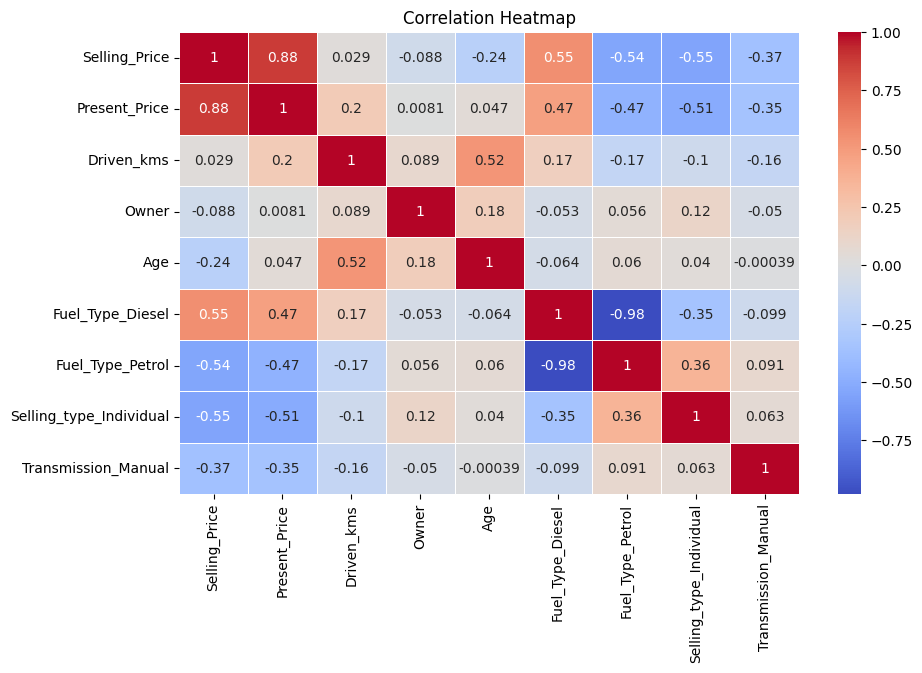

In [29]:
# 4. Data Visualization: Correlation Heatmap
# Understanding correlations between numerical variables
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
# 5. Define Features and Target
# 'X' contains all the features, while 'y' contains the target variable 'Selling_Price'
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

In [31]:
# 6. Splitting the data into training and testing sets
# Use 90% of the data for training and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [32]:
# Display the shapes of the training and testing sets to verify the split
print("\nShape of training and testing data:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Shape of training and testing data:
X_train: (270, 8), X_test: (31, 8)
y_train: (270,), y_test: (31,)


In [33]:
# 7. Model Training: Linear Regression
# Initialize the Linear Regression model and fit it on the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# 8. Predictions: Using the trained model to predict on the test data
y_pred = model.predict(X_test)

In [35]:
# 9. Model Evaluation: Mean Squared Error (MSE) and R-squared (R²) score
# These metrics help evaluate the performance of the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')


Model Evaluation Metrics:
Mean Squared Error (MSE): 2.67
R-squared (R²) Score: 0.82


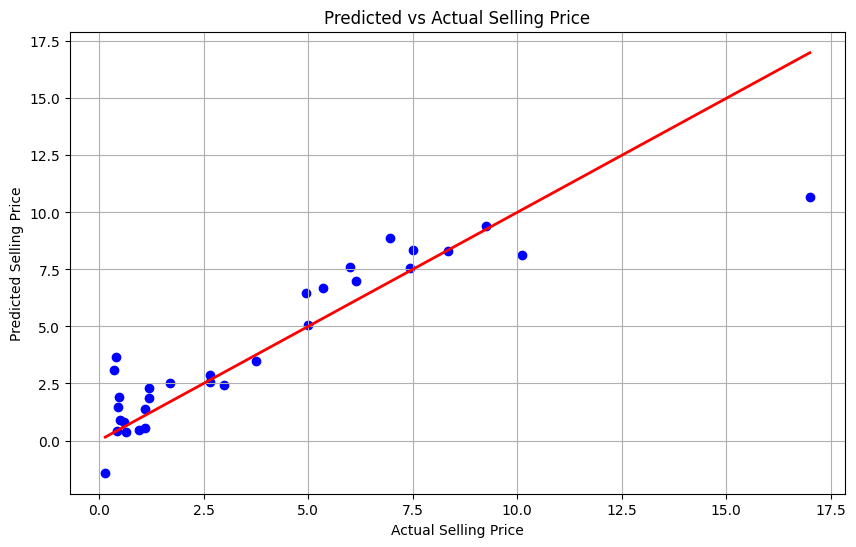

In [36]:
# 10. Data Visualization: Predicted vs Actual Selling Price
# Visualizing the relationship between predicted and actual selling prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Predicted vs Actual Selling Price')
plt.grid(True)
plt.show()